In [96]:
#For data processing
import pandas as pd
import numpy as np
import datetime as dt

#For data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#For models
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 

#version verify
from platform import python_version

In [97]:
# Check versions of modules used 
print("numpy: {}".format(np.__version__))
print("pandas: {}".format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print("seaborn: {}".format(sns.__version__))
#print("yahoo_finance: {}".format(yf.__version__))
print("python version:",python_version())

numpy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
seaborn: 0.10.0
python version: 3.7.6


In [237]:

# # fix_yahoo_finance is used to fetch data 
# import yfinance as yf
# yf.pdr_override()


# # input
# symbol = 'RELIANCE.NS'
# start = '2017-01-01'
# end = '2018-01-01'


# # dataframe
# dataset = yf.download(symbol,start,end)



# # View the last 5 rows
# print('Last 5 Rows')
# print(df.tail())

#Read input file

raw_data = pd.read_csv("C:\\Users\\tcgra\\Documents\\LJMU_Code\Datasets\\infosys_stock.csv")
raw_data.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,87.468803,88.356201,87.234398,88.068001,13.421628,11811200
1,2004-01-02,88.281197,89.218803,87.750000,88.543701,13.494125,17143168
2,2004-01-05,89.843803,92.890602,88.750000,91.979698,14.017772,24806720
3,2004-01-06,92.968803,93.906197,88.005501,88.828102,13.537469,24549504
4,2004-01-07,89.812500,90.578102,87.394501,88.956299,13.557004,38803008


In [238]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697 entries, 0 to 3696
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3697 non-null   object 
 1   Open       3697 non-null   float64
 2   High       3697 non-null   float64
 3   Low        3697 non-null   float64
 4   Close      3697 non-null   float64
 5   Adj Close  3697 non-null   float64
 6   Volume     3697 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 202.3+ KB


In [239]:
# Inspect the index 
raw_data.index

RangeIndex(start=0, stop=3697, step=1)

In [240]:
raw_data.describe() # Statistics

,Open,High,Low,Close,Adj Close,Volume
count,3697.000000,3697.000000,3697.000000,3697.000000,3697.000000,3.697000e+03
mean,342.715869,346.665133,338.535257,342.598951,214.030904,1.165000e+07
std,158.891899,160.170141,157.485243,158.775180,179.500216,9.376075e+06
min,74.000801,76.859398,64.454697,70.606201,10.760437,0.000000e+00
25%,209.375000,212.500000,204.580994,208.330994,63.978554,6.304472e+06
50%,332.875000,336.362000,328.825012,333.281006,157.249786,8.975208e+06
75%,475.899994,480.924988,471.513000,475.950012,402.027618,1.373815e+07
max,744.400024,754.900024,736.250000,746.650024,690.950439,1.663204e+08


In [241]:
print("Stock dataset has {} data points with {} variables each.".format(*raw_data.shape))

Stock dataset has 3697 data points with 7 variables each.


In [242]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in raw_data.columns:
    pct_missing = np.mean(raw_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Date - 0.0%
Open - 0.0%
High - 0.0%
Low - 0.0%
Close - 0.0%
Adj Close - 0.0%
Volume - 0.0%


In [243]:
#verify if there is any null values in the dataset
print(raw_data.isnull().sum())

#verify if there is any duplicate records
print(raw_data.duplicated())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
3692    False
3693    False
3694    False
3695    False
3696    False
Length: 3697, dtype: bool


In [244]:
dt_data = raw_data
dt_data = raw_data.set_index(['Date'])

Populating the interactive namespace from numpy and matplotlib


C:\Users\tcgra\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['normal', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


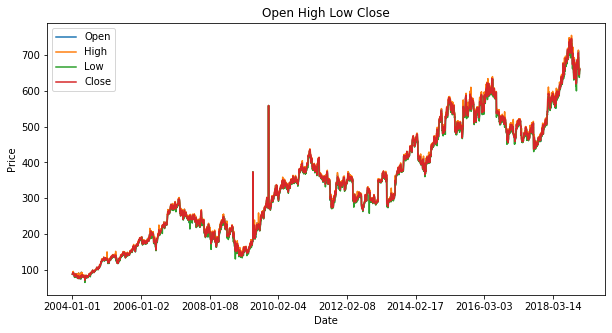

In [245]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
#dt_data['Date','Open','High','Low','Close'].plot(grid = True) # Plot the adjusted closing price of AAPL
dt_data[['Open','High','Low','Close']].plot(figsize=(10,5))
plt.title('Open High Low Close')
plt.ylabel("Price")
plt.show()

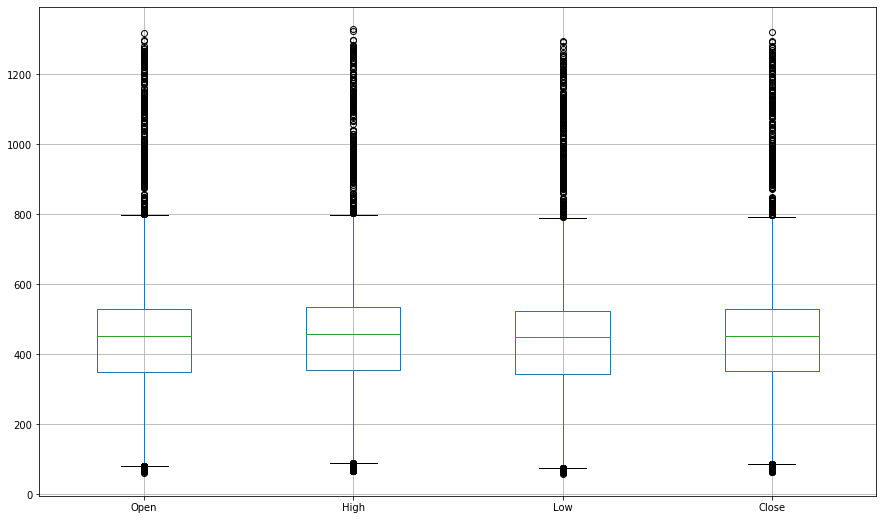

In [219]:
raw_data.boxplot(column=['Open','High','Low','Close'])

In [220]:
Q1=raw_data['Open'].quantile(0.25)
Q3=raw_data['Open'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)
raw_data.shape

350.34375
529.5
179.15625
81.609375 798.234375


(3698, 7)

In [221]:
raw_data = raw_data[raw_data['Open']< Upper_Whisker]
raw_data.shape

(3358, 7)

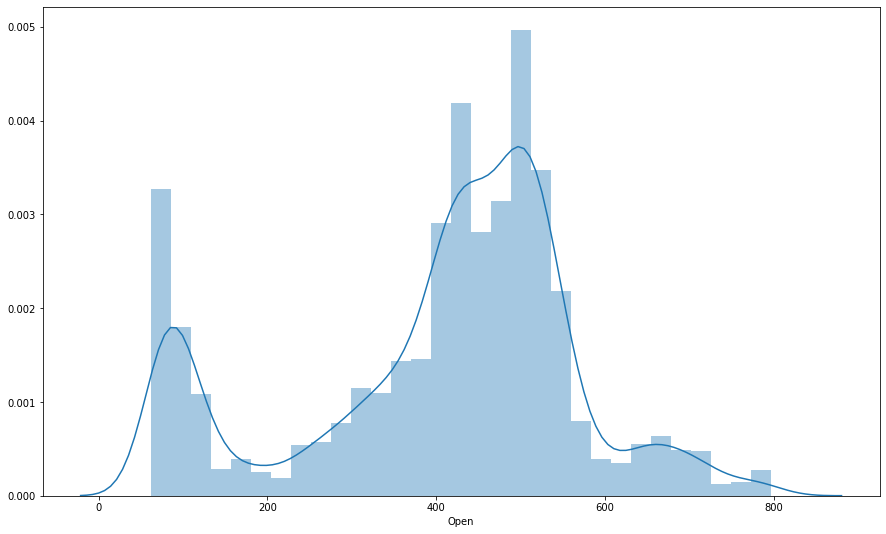

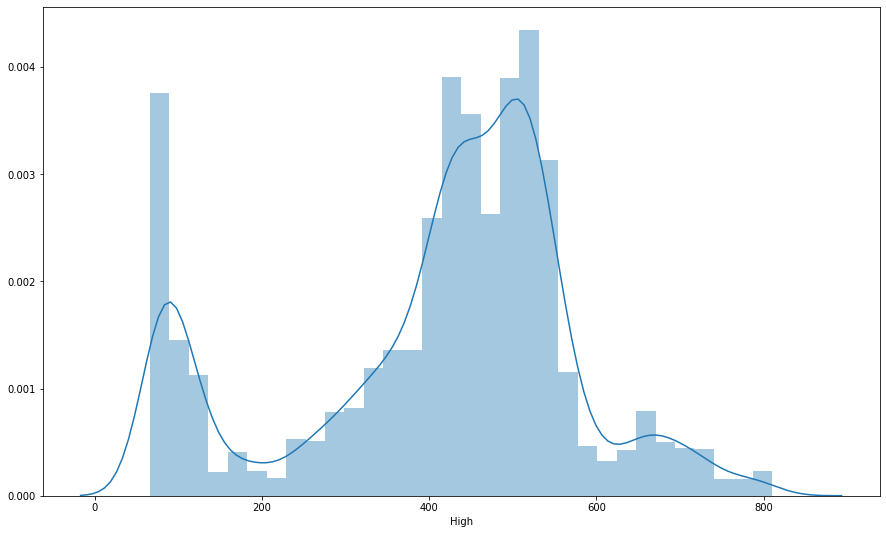

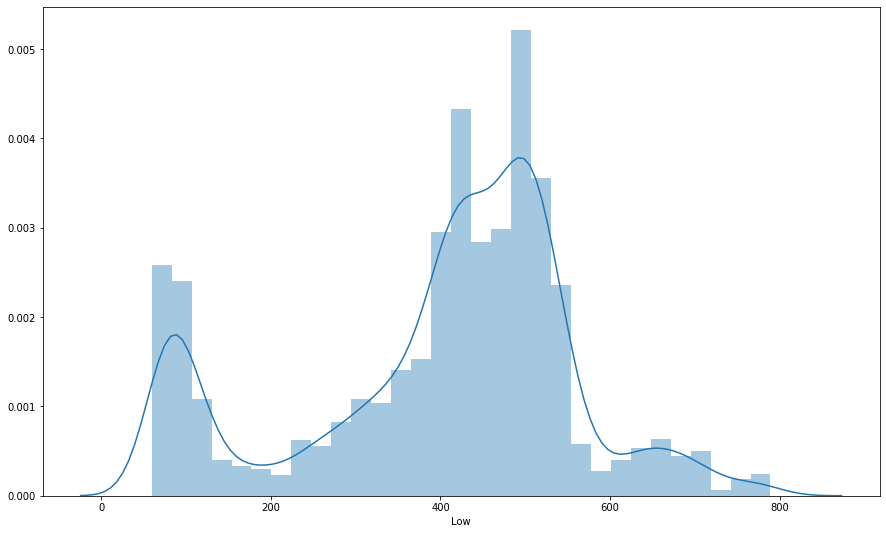

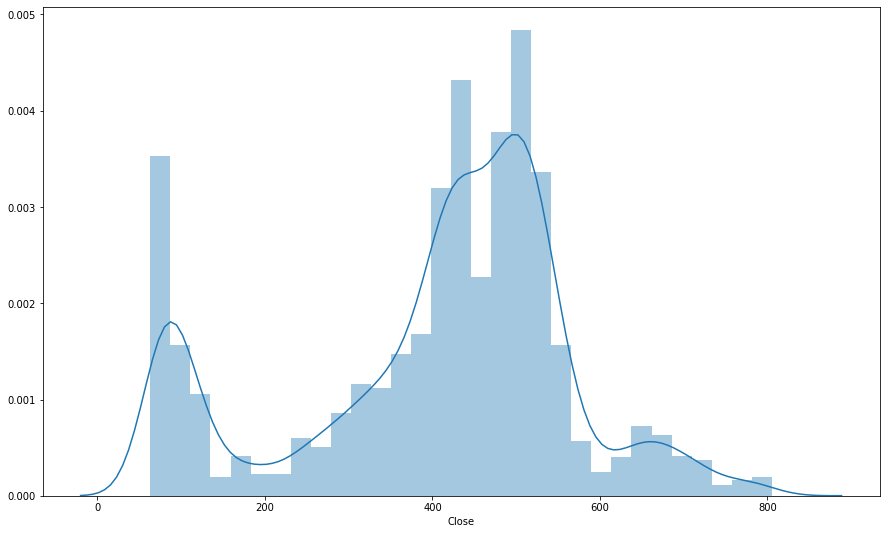

In [222]:
raw_data_float = pd.DataFrame(raw_data,columns=['Open','High','Low','Close'])


for i, col in enumerate(raw_data_float.columns):
    plt.figure(i)
    sns.distplot(raw_data[col])

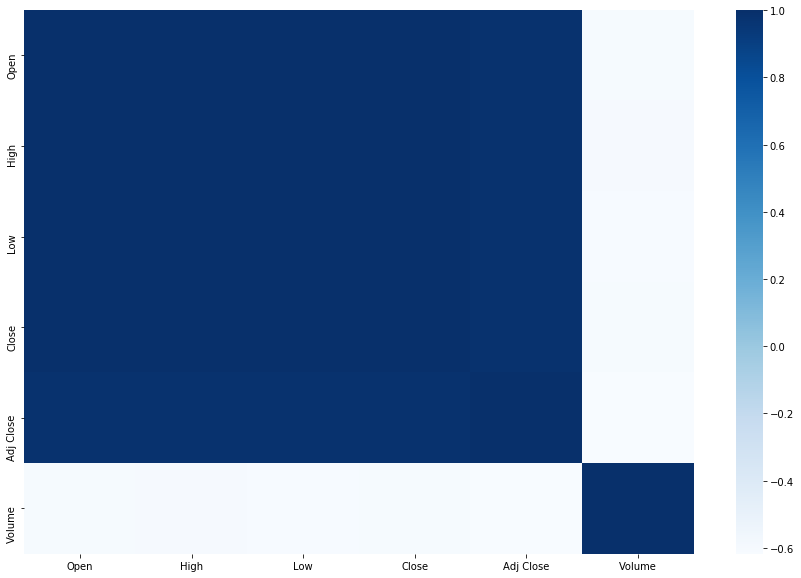

In [223]:
import seaborn as sns
#sns.set_style('White')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(15,10))
sns.heatmap(raw_data[1:].corr(), cmap='Blues')
plt.show()

# Return Distribution Analysis

In [224]:
# Convert into another dataset
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

#returns = raw_data['Adj Close'].pct_change()[1:].dropna()

stock_daily_returns = df['Adj Close'].pct_change()[1:].dropna()
stock_monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()[1:].dropna()
stock_yearly_returns = df['Adj Close'].resample('Y').ffill().pct_change()[1:].dropna()


In [225]:
returns = stock_yearly_returns

import statistics as st
import numpy as np
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest

print('Mean of returns:', np.mean(returns))
print('SD of returns:', np.std(returns))


print(skew(returns))
print(skewtest(returns))
print(kurtosis(returns))
print(kurtosistest(returns))

from statsmodels.stats.stattools import jarque_bera

_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')



Mean of returns: 0.3458965297850734
SD of returns: 0.5629635998102217
0.48187762823584124
SkewtestResult(statistic=0.9211984744631183, pvalue=0.3569468146050012)
-0.5681496187029249
KurtosistestResult(statistic=0.018072791553103332, pvalue=0.9855807836014452)
The returns are likely normal.


C:\Users\tcgra\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


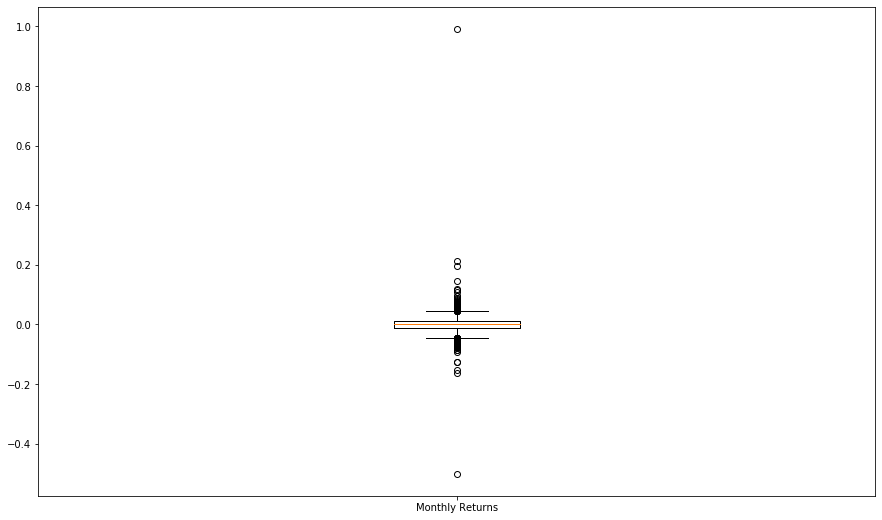

In [226]:
# boxplot

plt.boxplot(stock_daily_returns,labels=["Monthly Returns"])
plt.show()


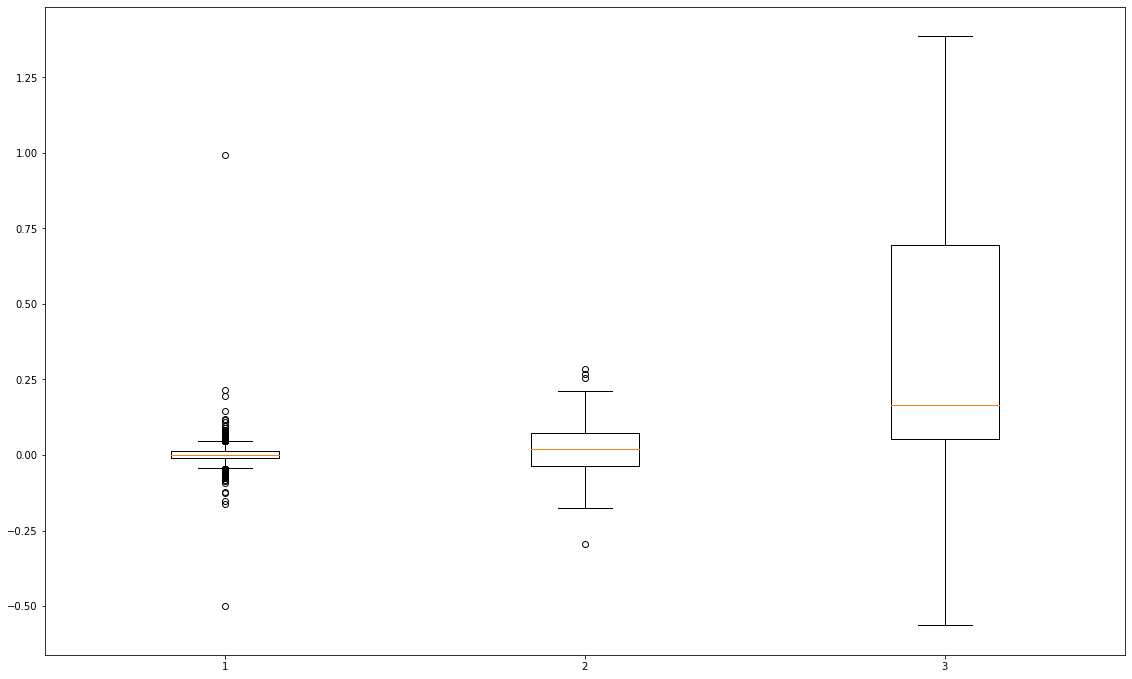

In [227]:
data_to_plot = [stock_daily_returns, stock_monthly_returns, stock_yearly_returns]
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(data_to_plot)
plt.show()

# Skewness & Kurtosis

In [228]:
print("Excess kurtosis of returns: ", stats.kurtosis(returns))

Excess kurtosis of returns:  -0.5681496187029249


In [229]:
from statsmodels.stats.stattools import jarque_bera

_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely normal.


Excess kurtosis of leptokurtic distribution: (array([ 0.02549725, -0.00880034, -0.01318795, ...,  0.01943614,
       -0.02050801,  0.02234597]), array([2., 2., 2., ..., 2., 2., 2.]))
Excess kurtosis of mesokurtic distribution: (array([ 0.02549725, -0.00880034, -0.01318795, ...,  0.01943614,
       -0.02050801,  0.02234597]), array([1., 1., 1., ..., 1., 1., 1.]))
Excess kurtosis of platykurtic distribution: (array([ 0.02549725, -0.00880034, -0.01318795, ...,  0.01943614,
       -0.02050801,  0.02234597]), array([1.28986813, 1.28986813, 1.28986813, ..., 1.28986813, 1.28986813,
       1.28986813]))


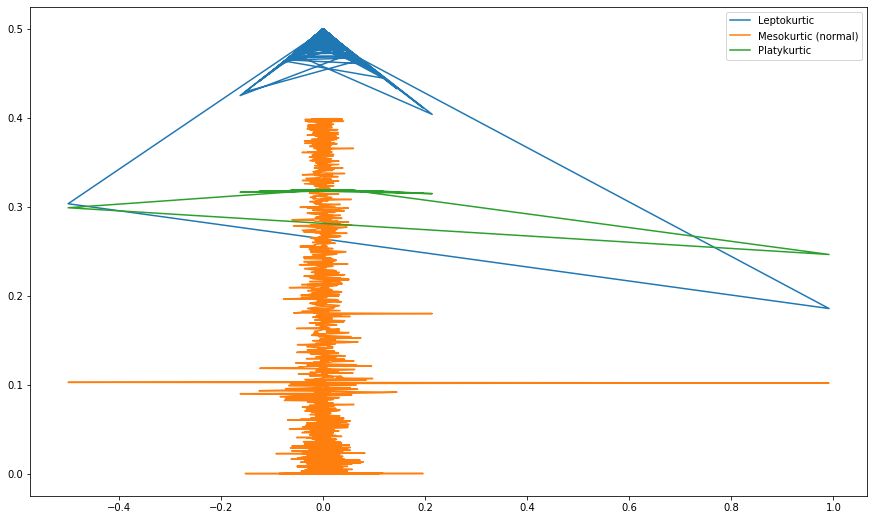

In [230]:

# Plot some example distributions stock's returns
returns = stock_daily_returns
xs = np.linspace(-6,6, (len(raw_data)-1))
normal = stats.norm.pdf(xs)
plt.plot(returns,stats.laplace.pdf(returns), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(returns)))
plt.plot(returns, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(returns)))
plt.plot(returns,stats.cosine.pdf(returns), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(returns)))
plt.legend()

# Distribution Analysis of Returns

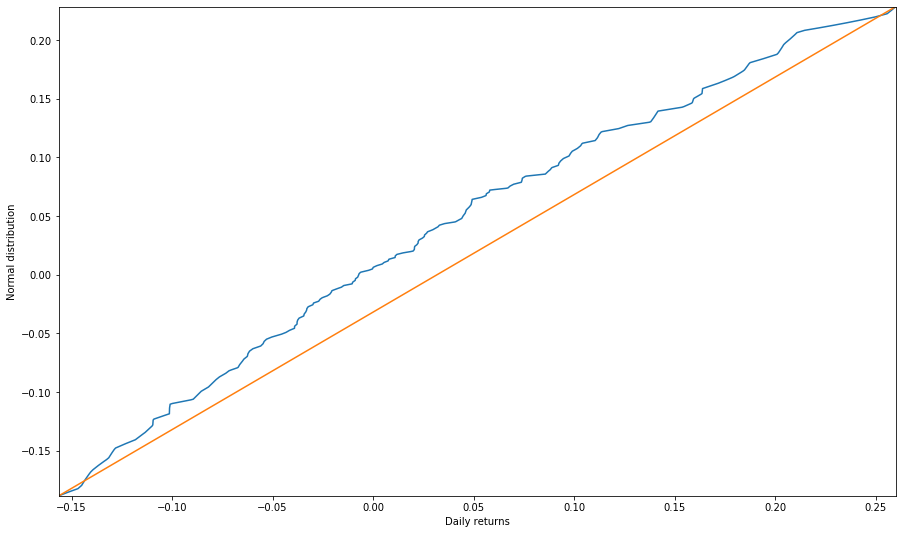

In [236]:
returns = stock_monthly_returns
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

C:\Users\tcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'Probability Density Function')

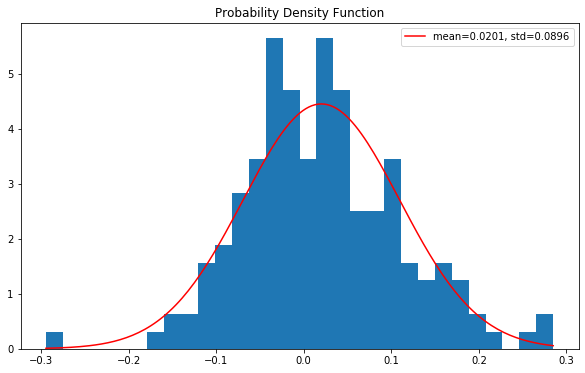

In [235]:
values = stock_monthly_returns
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')
ax.set_title("Probability Density Function")

values = stock_monthly_returns
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
#ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')
ax.set_title("Cumulative Probability Distribution")

C:\Users\tcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


ValueError: x and y must have same first dimension, but have shapes (3697,) and (3358,)

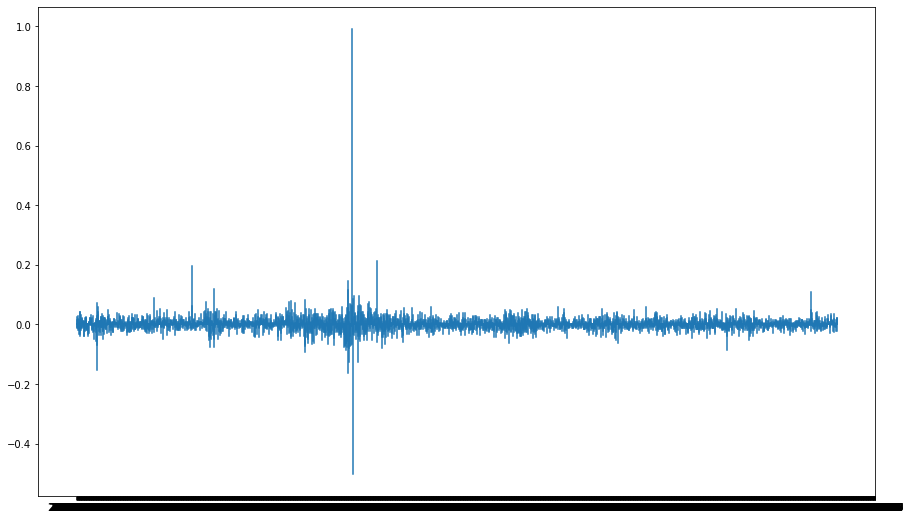

In [251]:
stock_daily_returns = df['Adj Close'].pct_change()
plt.stem(raw_data['Date'], stock_daily_returns)
(dt_data['Volume']/1000000).plot(figsize = (15, 7.5), 
                                 color = 'green', 
                                 alpha = 0.5)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

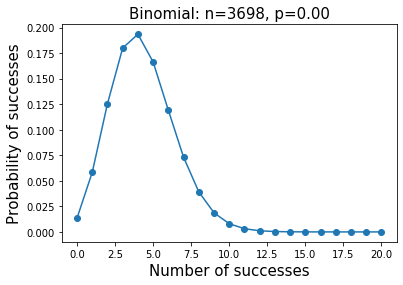

In [92]:
from scipy.stats import binom

n = len(raw_data['Returns'])
p = raw_data['Returns'].mean()
k = np.arange(0,21)
binomial = binom.pmf(k,n,p)

plt.plot(k, binomial, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()

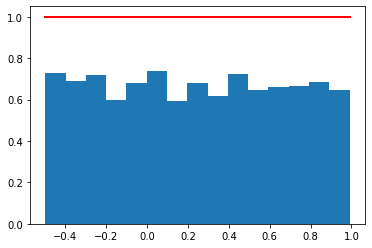

In [93]:
s = np.random.uniform(values.min(), values.max(), len(values))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [94]:
rate = 3 # Error Rate
n = np.arange(0,10) # Number of Trials
y = stats.poisson.pmf(n, rate)
y

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ])

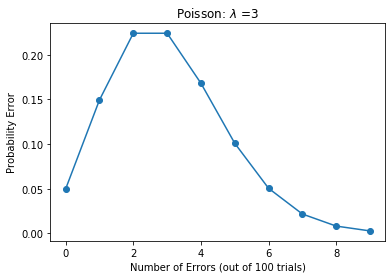

In [95]:

plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ =%i' % rate)
plt.ylabel('Probability Error')
plt.xlabel('Number of Errors (out of 100 trials)')
plt.show()

Compute Alpha & Beta